In [ ]:
def perspective_transform(heatmap , bbox):

    heatmap = heatmap

    #가우시안 히트맵은 미리 생성해서 로드하거나 바로 생성한다. 
    if heatmap == None:
        return heatmap  

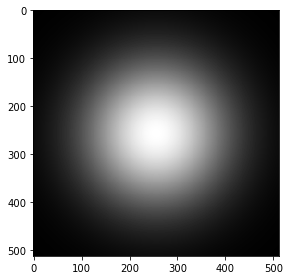

In [38]:
import cv2
from skimage import io 
import numpy as np 

#sample data load 
file_name = '/root/craft_re/sample_image/gaussian_heatmap/sample_heatmap.jpg'
file_name2 = '/root/craft_re/sample_image/gaussian_heatmap/sample_heatmap.npy'
img = cv2.imread(file_name)
gray_img = np.load(file_name2)

#col, row 
rows, cols = img.shape[:2]

#BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

io.imshow(gray_img)

In [52]:
pts1 = np.float32( [ [0,0] , [0,rows] , [cols,0] , [cols,rows] ] ) 
pts2 = np.float32([[50,50], [50,100], [100, 50], [100,100]])
pts3 = np.float32( [ [200,200] , [300,200] , [200,400] , [500,500] ])

In [53]:
cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0,rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,0), 10, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

#---③ 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)

mtrx2 = cv2.getPerspectiveTransform(pts1, pts3)
#---④ 원근 변환 적용
dst = cv2.warpPerspective(gray_img, mtrx, (cols, rows))

dst2 = cv2.warpPerspective(gray_img, mtrx2, (cols, rows))

/root/anaconda3/envs/craft/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


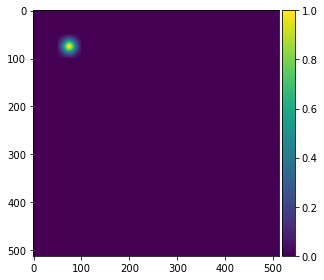

In [56]:
io.imshow(dst)

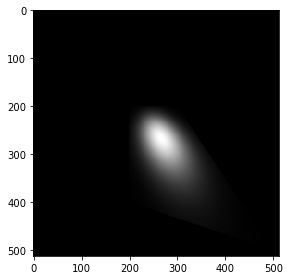

In [55]:
io.imshow(dst2)

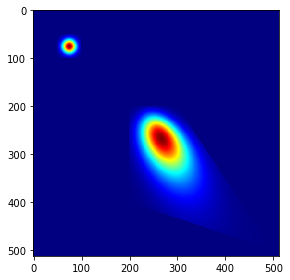

In [64]:
empty = np.zeros((512,512) , np.float32)
sample = empty + dst + dst2

sample = sample*255
sample = sample.astype(np.uint8)
sample = cv2.applyColorMap(sample , cv2.COLORMAP_JET)
sample = cv2.cvtColor(sample , cv2.COLOR_BGR2RGB)

io.imshow(sample)